# Hierarchical H-Clustering 

## Imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import time
import math
from sklearn.decomposition import PCA
import seaborn as sns

## Common Functions

In [57]:
def dist_calc(c1, c2, data):
  min = math.inf
  for i in c1:
    p1 = np.array(data[i,:])
    for j in c2:
      p2 = np.array(data[j,:])
      res = np.linalg.norm(p1 - p2)
      if res < min:
        min = res 
  return min
def construct_matrix(clusters, data):
  n = len(clusters)
  dist_matrix = np.zeros((n,n))
  for i in range(n):
    for j in range(i, n):
      dist_matrix[i,j] = dist_calc(clusters[i], clusters[j], data)
  return dist_matrix 
def fitness_dist(ind, k, data):
  ind_np = np.array(ind)
  sum_dist = 0
  for i in range(k):
    temp = data[ind_np == i,:]
    size = temp.shape[0]
    if size != 0:
      centroid = np.mean(temp, axis = 0)
      dist = (temp[:,0] - centroid[0])**2 + (temp[:,1] - centroid[1])**2 + (temp[:,2] - centroid[2])**2 + (temp[:,3] - centroid[3])**2
      sum_dist = sum_dist + (np.sum(np.sqrt(dist)) / size)
  return sum_dist

## H-Clustering 

In [58]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 10

t0 = time.time()
temp = np.arange(n)
temp.shape = (n,1)
clusters = temp.tolist()
dist_matrix = construct_matrix(clusters, iris)
np.unravel_index(dist_matrix.argmax(), dist_matrix.shape)

K = n
while (K > k):
  dist_matrix = construct_matrix(clusters, iris)
  idx = np.unravel_index(dist_matrix.argmax(), dist_matrix.shape)
  clusters[idx[0]] = clusters[idx[0]] + clusters[idx[1]]
  clusters.pop(idx[1])
  K = len(clusters)
t1 = time.time()
print(t1-t0)
#while (len(clusters) > k):
#  k = k + 1
#  print

11.361841678619385


In [48]:
for clust in clusters:
  print(clust)

assignments = np.zeros(n)
for i in range(len(clusters)):
  for j in clusters[i]:
    assignments[j] = i
fitness_dist(assignments, k, iris)

[0, 112, 84, 15, 134, 98, 75, 44, 72, 45, 129, 92, 8, 135, 88, 10, 114, 50, 57, 11, 115, 68]
[1, 140, 67, 46, 146, 7, 145, 66, 14, 100, 60, 65, 42, 122, 94, 20, 149]
[2, 109, 53, 56, 17, 116, 97]
[3, 144, 82, 18, 83, 28, 148, 87, 16, 128, 61, 25, 52, 37, 143, 80, 51]
[4, 104, 79, 54, 34, 141, 55, 26, 133, 36, 103, 74, 47, 107, 89, 138]
[5, 113, 38, 105, 99, 39, 110, 73, 19, 137, 78, 35, 125, 59, 58]
[6, 130, 69, 126, 23, 76, 33, 108, 93, 85, 49, 124, 95, 21, 101, 30, 147, 63]
[9, 136, 71, 13, 118, 62, 70, 43, 119, 48, 111, 91, 24, 123, 32, 132, 41, 131, 90, 40, 120, 81, 121]
[12, 102, 64, 127, 27, 77]
[22, 117, 106, 86, 31, 142, 29, 139, 96]


(19.36015328839664,)

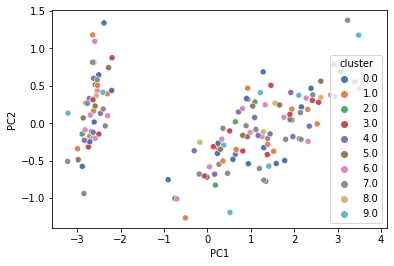

In [59]:
data = PCA(n_components = 2).fit_transform(iris)
df = pd.DataFrame(data, columns = ['PC1', 'PC2'])
df['cluster'] = assignments
sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'cluster', palette = "deep")